In [1]:
import json
import logging

# Adding # noqa to a line indicates that the linter 
# (a program that automatically checks code quality) 
# should not check this line. 
# Any warnings that code may have generated will be ignored.

import hvplot.pandas  # noqa 
import polars as pl
import pandas as pd
from rich import print
from rich.console import Console
console = Console(record=True)


from pydantic import BaseModel


from degiro_connector.quotecast.tools.chart_fetcher import ChartFetcher, SeriesFormatter
from degiro_connector.quotecast.models.chart import ChartRequest, Interval


In [2]:
import logging
logging.basicConfig(level=logging.CRITICAL)

# debug_mode = True

logging.info("This is a info message")
logging.debug("This is a debug message")
logging.warning("This is a warning message")
logging.error("This is a error message")
logging.critical("This is a critical message, no messing around")


CRITICAL:root:This is a critical message, no messing around


In [3]:

with open("../Courses/PythonExercises/config/config.json") as config_file:
    config_dict = json.load(config_file)


In [4]:

# FETCH CHART
user_token = config_dict.get("user_token")  # HERE GOES YOUR USER_TOKEN
chart_fetcher = ChartFetcher(user_token=user_token)
chart_request = ChartRequest(
    culture="fr-FR",
    # override={
    #     "resolution": "P1D",
    #     "period": "P1W",
    # },
    period=Interval.P1D,
    requestid="1",
    resolution=Interval.PT60M,
    series=[
        # "issueid:360148977",
        # "price:issueid:360148977",
        # "ohlc:issueid:360148977",
        "issueid:11773",
        "ohlc:issueid:11773", # ING
        "issueid:600826062",
        "ohlc:issueid:600826062", # Universal
        # "volume:issueid:360148977",
        # "vwdkey:AAPL.BATS,E",
        # "price:vwdkey:AAPL.BATS,E",
        # "ohlc:vwdkey:AAPL.BATS,E",
        # "volume:vwdkey:AAPL.BATS,E",
    ],
    tz="Europe/Paris",
)
print(chart_request)
chart = chart_fetcher.get_chart(
    chart_request=chart_request,
    raw=False,
)
print(chart)

ChartRequest(
    callback='vwd.hchart.seriesRequestManager.sync_response',
    culture='fr-FR',
    override={},
    format='json',
    period=<Interval.P1D: 'P1D'>,
    requestid='1',
    resolution=<Interval.PT60M: 'PT60M'>,
    series=['issueid:11773', 'ohlc:issueid:11773', 'issueid:600826062', 'ohlc:issueid:600826062'],
    tz='Europe/Paris',
    user_token=None
)

Chart(
    end='2024-05-21T16:03:44',
    requestid='1',
    resolution='PT1H',
    series=[
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 43470, tzinfo=TzInfo(+02:00)),
            data={
                'issueId': 11773,
                'companyId': 200,
                'name': 'ING Groupe',
                'identifier': 'issueid:11773',
                'isin': 'NL0011821202',
                'alfa': 'INGA1',
                'market': 'XAMS',
                'currency': 'EUR',
                'type': 'AAN',
                'quality': 'REALTIME',
                'lastPrice': 16.57,
                'lastTime': '2024-05-21T16:03:43',
                'absDiff': 0.004,
                'relDiff': 0.00024,
                'highPrice': 16.594,
                'highTime': '2024-05-21T14:22:31',
                'lowPrice': 16.48,
                'lowTime': '2024-05-21T09:00:29',
                'openPrice': 16.5,
                'openTime': '2024-05-21T09:00:29',
                'closePrice': 16.5,
                'closeTime': '2024-05-21T09:00:29',
                'cumulativeVolume': 2674489.0,
                'previousClosePrice': 16.566,
                'previousCloseTime': '2024-05-20T17:36:39',
                'tradingStartTime': '09:00:00',
                'tradingEndTime': '17:40:00',
                'tradingAddedTime': '00:20:00',
                'lowPriceP1Y': 11.428,
                'highPriceP1Y': 16.656,
                'windowStart': '2024-05-21T00:00:00',
                'windowEnd': '2024-05-21T16:03:44',
                'windowFirst': '2024-05-21T09:00:00',
                'windowLast': '2024-05-21T16:03:00',
                'windowHighTime': '2024-05-21T14:22:00',
                'windowHighPrice': 16.594,
                'windowLowTime': '2024-05-21T09:00:00',
                'windowLowPrice': 16.48,
                'windowOpenTime': '2024-05-21T09:00:29',
                'windowOpenPrice': 16.5,
                'windowPreviousCloseTime': '2024-05-20T17:36:39',
                'windowPreviousClosePrice': 16.566,
                'windowTrend': 0.00024
            },
            id='issueid:11773',
            type='object',
            times=None
        ),
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 44469, tzinfo=TzInfo(+02:00)),
            data=[
                [9, 16.5, 16.56, 16.48, 16.53],
                [10, 16.528, 16.59, 16.524, 16.574],
                [11, 16.568, 16.588, 16.492, 16.5],
                [12, 16.498, 16.55, 16.498, 16.544],
                [13, 16.542, 16.574, 16.538, 16.568],
                [14, 16.568, 16.594, 16.526, 16.526],
                [15, 16.524, 16.588, 16.512, 16.566],
                [16, 16.57, 16.578, 16.566, 16.57]
            ],
            id='ohlc:issueid:11773',
            type='ohlc',
            times='2024-05-21T00:00:00/PT1H'
        ),
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 65466, tzinfo=TzInfo(+02:00)),
            data={
                'issueId': 600826062,
                'companyId': 131227,
                'name': 'UMG',
                'identifier': 'issueid:600826062',
                'isin': 'NL0015000IY2',
                'alfa': 'UMG',
                'market': 'XAMS',
                'currency': 'EUR',
                'type': 'AAN',
                'quality': 'REALTIME',
                'lastPrice': 28.19,
                'lastTime': '2024-05-21T16:03:44',
                'absDiff': -0.37,
                'relDiff': -0.01296,
                'highPrice': 28.58,
                'highTime': '2024-05-21T09:00:25',
                'lowPrice': 28.18,
                'lowTime': '2024-05-21T16:03:42',
                'openPrice': 28.56,
                'openTime': '2024-05-21T09:00:01',
                'closePrice': 28.56,
                'closeTime': '2024-05-21T09:00:01',
                'cumulativeVolume': 150679.0,
                'previousClosePrice': 2

In [24]:
listOfReq = ['ohlc:issueid:11797', 'ohlc:issueid:612967', 'ohlc:issueid:247828', 'ohlc:issueid:11804', 'ohlc:issueid:613007', 'ohlc:issueid:11754', 'ohlc:issueid:289864', 'ohlc:issueid:24479', 'ohlc:issueid:11756', 'ohlc:issueid:613004', 'ohlc:issueid:600825866', 'ohlc:issueid:11821', 'ohlc:issueid:108955', 'ohlc:issueid:244002', 'ohlc:issueid:383621', 'ohlc:issueid:16953', 'ohlc:issueid:11895', 'ohlc:issueid:100013', 'ohlc:issueid:11808', 'ohlc:issueid:16923', 'ohlc:issueid:596718', 'ohlc:issueid:600324580', 'ohlc:issueid:600825747', 'ohlc:issueid:613006', 'ohlc:issueid:11816', 'ohlc:issueid:596722', 'ohlc:issueid:11820', 'ohlc:issueid:600825994', 'ohlc:issueid:12037', 'ohlc:issueid:11829', 'ohlc:issueid:600825581', 'ohlc:issueid:613003', 'ohlc:issueid:596714', 'ohlc:issueid:11762', 'ohlc:issueid:22797', 'ohlc:issueid:600825744', 'ohlc:issueid:600827487', 'ohlc:issueid:11945', 'ohlc:issueid:600826085', 'ohlc:issueid:11764', 'ohlc:issueid:11844', 'ohlc:issueid:600826097', 'ohlc:issueid:600428654', 'ohlc:issueid:215690', 'ohlc:issueid:12181', 'ohlc:issueid:600826527', 'ohlc:issueid:600503149', 'ohlc:issueid:600826872', 'ohlc:issueid:600826461', 'ohlc:issueid:612908', 'ohlc:issueid:596708', 'ohlc:issueid:11859', 'ohlc:issueid:60189120', 'ohlc:issueid:11873', 'ohlc:issueid:11881', 'ohlc:issueid:11770', 'ohlc:issueid:11880', 'ohlc:issueid:11876', 'ohlc:issueid:13311', 'ohlc:issueid:612982', 'ohlc:issueid:610603', 'ohlc:issueid:11773', 'ohlc:issueid:600825682', 'ohlc:issueid:386055', 'ohlc:issueid:561749', 'ohlc:issueid:11949', 'ohlc:issueid:11755', 'ohlc:issueid:25845', 'ohlc:issueid:32869', 'ohlc:issueid:612860', 'ohlc:issueid:600499935', 'ohlc:issueid:11664', 'ohlc:issueid:600826108', 'ohlc:issueid:11924', 'ohlc:issueid:441792', 'ohlc:issueid:95817', 'ohlc:issueid:504964', 'ohlc:issueid:600826000', 'ohlc:issueid:11916', 'ohlc:issueid:610720', 'ohlc:issueid:22987', 'ohlc:issueid:600825950', 'ohlc:issueid:524777', 'ohlc:issueid:11813', 'ohlc:issueid:612797', 'ohlc:issueid:96535', 'ohlc:issueid:11783', 'ohlc:issueid:11943', 'ohlc:issueid:25755', 'ohlc:issueid:600364250', 'ohlc:issueid:600364249', 'ohlc:issueid:600539912', 'ohlc:issueid:11785', 'ohlc:issueid:600358836', 'ohlc:issueid:11765', 'ohlc:issueid:600598926', 'ohlc:issueid:11889', 'ohlc:issueid:210964', 'ohlc:issueid:600259743', 'ohlc:issueid:596711', 'ohlc:issueid:11951', 'ohlc:issueid:600826124', 'ohlc:issueid:239169', 'ohlc:issueid:600827415', 'ohlc:issueid:106662', 'ohlc:issueid:11958', 'ohlc:issueid:208564', 'ohlc:issueid:11962', 'ohlc:issueid:600826062', 'ohlc:issueid:11849', 'ohlc:issueid:97058', 'ohlc:issueid:12206', 'ohlc:issueid:612799', 'ohlc:issueid:230905', 'ohlc:issueid:101431', 'ohlc:issueid:12218', 'ohlc:issueid:11795']
n_element = 60
# FETCH CHART
user_token = config_dict.get("user_token")  # HERE GOES YOUR USER_TOKEN
chart_fetcher = ChartFetcher(user_token=user_token)
chart_request = ChartRequest(
    culture="fr-FR",
    # override={
    #     "resolution": "P1D",
    #     "period": "P1W",
    # },
    period=Interval.P1D,
    requestid="1",
    resolution=Interval.PT60M,
    series=listOfReq[:n_element],
    tz="Europe/Paris",
)
# print(chart_request)
chart = chart_fetcher.get_chart(
    chart_request=chart_request,
    raw=False,
)
# print(chart)

Not interested in what is below

In [6]:

# FETCH CHART
user_token = config_dict.get("user_token")  # HERE GOES YOUR USER_TOKEN
chart_fetcher = ChartFetcher(user_token=user_token)
chart_request = ChartRequest(
    culture="fr-FR",
    # override={
    #     "resolution": "P1D",
    #     "period": "P1W",
    # },
    period=Interval.P1D,
    requestid="1",
    resolution=Interval.PT60M,
    series=[
        # "issueid:360148977",
        # "price:issueid:360148977",
        # "ohlc:issueid:360148977",
        "ohlc:issueid:11797",
        "ohlc:issueid:612967",
        "ohlc:issueid:247828",
        "ohlc:issueid:11804",
        "ohlc:issueid:613007",
        #"issueid:11773",
        #"ohlc:issueid:11773", # ING
        #"issueid:600826062",
        #"ohlc:issueid:600826062", # Universal
        # "volume:issueid:360148977",
        # "vwdkey:AAPL.BATS,E",
        # "price:vwdkey:AAPL.BATS,E",
        # "ohlc:vwdkey:AAPL.BATS,E",
        # "volume:vwdkey:AAPL.BATS,E",
    ],
    tz="Europe/Paris",
)
chart = chart_fetcher.get_chart(
    chart_request=chart_request,
    raw=False,
)
print(chart)

Chart(
    end='2024-05-21T16:03:58',
    requestid='1',
    resolution='PT1H',
    series=[
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 367238, tzinfo=TzInfo(+02:00)),
            data=[
                [9, 48.68, 48.7, 48.24, 48.26],
                [10, 48.22, 48.3, 48.2, 48.26],
                [11.133, 48.24, 48.26, 48.06, 48.16],
                [12.1, 48.12, 48.16, 48.02, 48.1],
                [13.117, 48.12, 48.12, 47.94, 47.96],
                [14.033, 47.98, 48.1, 47.92, 48.08],
                [15, 48.06, 48.16, 47.92, 47.92],
                [16.033, 47.96, 47.96, 47.96, 47.96]
            ],
            id='ohlc:issueid:11797',
            type='ohlc',
            times='2024-05-21T00:00:00/PT1H'
        ),
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 374235, tzinfo=TzInfo(+02:00)),
            data=[
                [9, 15.87, 15.895, 15.72, 15.73],
                [10, 15.73, 15.745, 15.68, 15.73],
                [11, 15.73, 15.75, 15.575, 15.595],
                [12, 15.6, 15.615, 15.575, 15.6],
                [13, 15.605, 15.64, 15.585, 15.635],
                [14, 15.635, 15.64, 15.6, 15.61],
                [15, 15.6, 15.7, 15.59, 15.665],
                [16, 15.665, 15.685, 15.665, 15.685]
            ],
            id='ohlc:issueid:612967',
            type='ohlc',
            times='2024-05-21T00:00:00/PT1H'
        ),
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 385236, tzinfo=TzInfo(+02:00)),
            data=[
                [9, 0.697, 0.697, 0.691, 0.691],
                [10.217, 0.691, 0.694, 0.691, 0.694],
                [11, 0.692, 0.692, 0.69, 0.69],
                [12.517, 0.698, 0.698, 0.691, 0.691],
                [13.367, 0.69, 0.697, 0.681, 0.681],
                [14.017, 0.681, 0.681, 0.681, 0.681],
                [15.167, 0.697, 0.697, 0.697, 0.697]
            ],
            id='ohlc:issueid:247828',
            type='ohlc',
            times='2024-05-21T00:00:00/PT1H'
        ),
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 397245, tzinfo=TzInfo(+02:00)),
            data=[
                [9, 17.5, 17.54, 17.46, 17.5],
                [10.25, 17.52, 17.52, 17.46, 17.46],
                [11.067, 17.5, 17.54, 17.4, 17.46],
                [12.1, 17.48, 17.48, 17.42, 17.48],
                [13.183, 17.48, 17.48, 17.44, 17.44],
                [14.017, 17.44, 17.48, 17.44, 17.46],
                [15.05, 17.46, 17.46, 17.4, 17.44]
            ],
            id='ohlc:issueid:11804',
            type='ohlc',
            times='2024-05-21T00:00:00/PT1H'
        ),
        Series(
            expires=datetime.datetime(2024, 5, 21, 16, 4, 7, 397245, tzinfo=TzInfo(+02:00)),
            data=[
                [9, 1235.4, 1244.0, 1230.4, 1232.8],
                [10, 1232.4, 1234.4, 1229.2, 1233.0],
                [11, 1233.0, 1236.2, 1230.4, 1230.4],
                [12.017, 1231.0, 1234.8, 1224.4, 1228.6],
                [13, 1228.4, 1231.6, 1227.6, 1230.6],
                [14, 1230.8, 1231.0, 1223.6, 1223.6],
                [15, 1223.4, 1227.6, 1218.4, 1226.0],
                [16, 1226.2, 1226.2, 1225.6, 1226.2]
            ],
            id='ohlc:issueid:613007',
            type='ohlc',
            times='2024-05-21T00:00:00/PT1H'
        )
    ],
    start='2024-05-21T00:00:00'
)

In [7]:

print("first table")
if isinstance(chart, BaseModel):
    for series in chart.series:
        print(pl.DataFrame(data=series.data, orient="row"))

print("second table")
if isinstance(chart, dict):
    print(chart)


first table

shape: (8, 5)
┌──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╡
│ 9.0      ┆ 48.68    ┆ 48.7     ┆ 48.24    ┆ 48.26    │
│ 10.0     ┆ 48.22    ┆ 48.3     ┆ 48.2     ┆ 48.26    │
│ 11.133   ┆ 48.24    ┆ 48.26    ┆ 48.06    ┆ 48.16    │
│ 12.1     ┆ 48.12    ┆ 48.16    ┆ 48.02    ┆ 48.1     │
│ 13.117   ┆ 48.12    ┆ 48.12    ┆ 47.94    ┆ 47.96    │
│ 14.033   ┆ 47.98    ┆ 48.1     ┆ 47.92    ┆ 48.08    │
│ 15.0     ┆ 48.06    ┆ 48.16    ┆ 47.92    ┆ 47.92    │
│ 16.033   ┆ 47.96    ┆ 47.96    ┆ 47.96    ┆ 47.96    │
└──────────┴──────────┴──────────┴──────────┴──────────┘

shape: (8, 5)
┌──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ i64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╡
│ 9        ┆ 15.87    ┆ 15.895   ┆ 15.72    ┆ 15.73    │
│ 10       ┆ 15.73    ┆ 15.745   ┆ 15.68    ┆ 15.73    │
│ 11       ┆ 15.73    ┆ 15.75    ┆ 15.575   ┆ 15.595   │
│ 12       ┆ 15.6     ┆ 15.615   ┆ 15.575   ┆ 15.6     │
│ 13       ┆ 15.605   ┆ 15.64    ┆ 15.585   ┆ 15.635   │
│ 14       ┆ 15.635   ┆ 15.64    ┆ 15.6     ┆ 15.61    │
│ 15       ┆ 15.6     ┆ 15.7     ┆ 15.59    ┆ 15.665   │
│ 16       ┆ 15.665   ┆ 15.685   ┆ 15.665   ┆ 15.685   │
└──────────┴──────────┴──────────┴──────────┴──────────┘

shape: (7, 5)
┌──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╡
│ 9.0      ┆ 0.697    ┆ 0.697    ┆ 0.691    ┆ 0.691    │
│ 10.217   ┆ 0.691    ┆ 0.694    ┆ 0.691    ┆ 0.694    │
│ 11.0     ┆ 0.692    ┆ 0.692    ┆ 0.69     ┆ 0.69     │
│ 12.517   ┆ 0.698    ┆ 0.698    ┆ 0.691    ┆ 0.691    │
│ 13.367   ┆ 0.69     ┆ 0.697    ┆ 0.681    ┆ 0.681    │
│ 14.017   ┆ 0.681    ┆ 0.681    ┆ 0.681    ┆ 0.681    │
│ 15.167   ┆ 0.697    ┆ 0.697    ┆ 0.697    ┆ 0.697    │
└──────────┴──────────┴──────────┴──────────┴──────────┘

shape: (7, 5)
┌──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╡
│ 9.0      ┆ 17.5     ┆ 17.54    ┆ 17.46    ┆ 17.5     │
│ 10.25    ┆ 17.52    ┆ 17.52    ┆ 17.46    ┆ 17.46    │
│ 11.067   ┆ 17.5     ┆ 17.54    ┆ 17.4     ┆ 17.46    │
│ 12.1     ┆ 17.48    ┆ 17.48    ┆ 17.42    ┆ 17.48    │
│ 13.183   ┆ 17.48    ┆ 17.48    ┆ 17.44    ┆ 17.44    │
│ 14.017   ┆ 17.44    ┆ 17.48    ┆ 17.44    ┆ 17.46    │
│ 15.05    ┆ 17.46    ┆ 17.46    ┆ 17.4     ┆ 17.44    │
└──────────┴──────────┴──────────┴──────────┴──────────┘

shape: (8, 5)
┌──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╡
│ 9.0      ┆ 1235.4   ┆ 1244.0   ┆ 1230.4   ┆ 1232.8   │
│ 10.0     ┆ 1232.4   ┆ 1234.4   ┆ 1229.2   ┆ 1233.0   │
│ 11.0     ┆ 1233.0   ┆ 1236.2   ┆ 1230.4   ┆ 1230.4   │
│ 12.017   ┆ 1231.0   ┆ 1234.8   ┆ 1224.4   ┆ 1228.6   │
│ 13.0     ┆ 1228.4   ┆ 1231.6   ┆ 1227.6   ┆ 1230.6   │
│ 14.0     ┆ 1230.8   ┆ 1231.0   ┆ 1223.6   ┆ 1223.6   │
│ 15.0     ┆ 1223.4   ┆ 1227.6   ┆ 1218.4   ┆ 1226.0   │
│ 16.0     ┆ 1226.2   ┆ 1226.2   ┆ 1225.6   ┆ 1226.2   │
└──────────┴──────────┴──────────┴──────────┴──────────┘

second table

In [8]:

print("third table - formatted with names")
if chart:
    for series in chart.series:
        if series.times is None or series.type not in ["time", "ohlc"]:
            print("this part of the data is an ",series.type,", sorry cannot print")
        else :
            df = SeriesFormatter.format(series=series)
            print(df)
            print(type(df))
            if series.id.startswith("ohlc"):
                dfPd = df.to_pandas()
                print(dfPd)
            # dfPd.plot.line(x="timestamp")
            # df_formatted = pl.DataFrame(df)
            # print(type(df_formatted))
            


third table - formatted with names

shape: (8, 5)
┌─────────────────────────┬───────┬───────┬───────┬───────┐
│ timestamp               ┆ open  ┆ high  ┆ low   ┆ close │
│ ---                     ┆ ---   ┆ ---   ┆ ---   ┆ ---   │
│ datetime[μs]            ┆ f64   ┆ f64   ┆ f64   ┆ f64   │
╞═════════════════════════╪═══════╪═══════╪═══════╪═══════╡
│ 2024-05-21 09:00:00     ┆ 48.68 ┆ 48.7  ┆ 48.24 ┆ 48.26 │
│ 2024-05-21 10:00:00     ┆ 48.22 ┆ 48.3  ┆ 48.2  ┆ 48.26 │
│ 2024-05-21 11:07:58.800 ┆ 48.24 ┆ 48.26 ┆ 48.06 ┆ 48.16 │
│ 2024-05-21 12:06:00     ┆ 48.12 ┆ 48.16 ┆ 48.02 ┆ 48.1  │
│ 2024-05-21 13:07:01.200 ┆ 48.12 ┆ 48.12 ┆ 47.94 ┆ 47.96 │
│ 2024-05-21 14:01:58.800 ┆ 47.98 ┆ 48.1  ┆ 47.92 ┆ 48.08 │
│ 2024-05-21 15:00:00     ┆ 48.06 ┆ 48.16 ┆ 47.92 ┆ 47.92 │
│ 2024-05-21 16:01:58.800 ┆ 47.96 ┆ 47.96 ┆ 47.96 ┆ 47.96 │
└─────────────────────────┴───────┴───────┴───────┴───────┘

<class 'polars.dataframe.frame.DataFrame'>

timestamp   open   high    low  close
0 2024-05-21 09:00:00.000  48.68  48.70  48.24  48.26
1 2024-05-21 10:00:00.000  48.22  48.30  48.20  48.26
2 2024-05-21 11:07:58.800  48.24  48.26  48.06  48.16
3 2024-05-21 12:06:00.000  48.12  48.16  48.02  48.10
4 2024-05-21 13:07:01.200  48.12  48.12  47.94  47.96
5 2024-05-21 14:01:58.800  47.98  48.10  47.92  48.08
6 2024-05-21 15:00:00.000  48.06  48.16  47.92  47.92
7 2024-05-21 16:01:58.800  47.96  47.96  47.96  47.96

shape: (8, 5)
┌─────────────────────┬────────┬────────┬────────┬────────┐
│ timestamp           ┆ open   ┆ high   ┆ low    ┆ close  │
│ ---                 ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ datetime[μs]        ┆ f64    ┆ f64    ┆ f64    ┆ f64    │
╞═════════════════════╪════════╪════════╪════════╪════════╡
│ 2024-05-21 09:00:00 ┆ 15.87  ┆ 15.895 ┆ 15.72  ┆ 15.73  │
│ 2024-05-21 10:00:00 ┆ 15.73  ┆ 15.745 ┆ 15.68  ┆ 15.73  │
│ 2024-05-21 11:00:00 ┆ 15.73  ┆ 15.75  ┆ 15.575 ┆ 15.595 │
│ 2024-05-21 12:00:00 ┆ 15.6   ┆ 15.615 ┆ 15.575 ┆ 15.6   │
│ 2024-05-21 13:00:00 ┆ 15.605 ┆ 15.64  ┆ 15.585 ┆ 15.635 │
│ 2024-05-21 14:00:00 ┆ 15.635 ┆ 15.64  ┆ 15.6   ┆ 15.61  │
│ 2024-05-21 15:00:00 ┆ 15.6   ┆ 15.7   ┆ 15.59  ┆ 15.665 │
│ 2024-05-21 16:00:00 ┆ 15.665 ┆ 15.685 ┆ 15.665 ┆ 15.685 │
└─────────────────────┴────────┴────────┴────────┴────────┘

<class 'polars.dataframe.frame.DataFrame'>

timestamp    open    high     low   close
0 2024-05-21 09:00:00  15.870  15.895  15.720  15.730
1 2024-05-21 10:00:00  15.730  15.745  15.680  15.730
2 2024-05-21 11:00:00  15.730  15.750  15.575  15.595
3 2024-05-21 12:00:00  15.600  15.615  15.575  15.600
4 2024-05-21 13:00:00  15.605  15.640  15.585  15.635
5 2024-05-21 14:00:00  15.635  15.640  15.600  15.610
6 2024-05-21 15:00:00  15.600  15.700  15.590  15.665
7 2024-05-21 16:00:00  15.665  15.685  15.665  15.685

shape: (7, 5)
┌─────────────────────────┬───────┬───────┬───────┬───────┐
│ timestamp               ┆ open  ┆ high  ┆ low   ┆ close │
│ ---                     ┆ ---   ┆ ---   ┆ ---   ┆ ---   │
│ datetime[μs]            ┆ f64   ┆ f64   ┆ f64   ┆ f64   │
╞═════════════════════════╪═══════╪═══════╪═══════╪═══════╡
│ 2024-05-21 09:00:00     ┆ 0.697 ┆ 0.697 ┆ 0.691 ┆ 0.691 │
│ 2024-05-21 10:13:01.200 ┆ 0.691 ┆ 0.694 ┆ 0.691 ┆ 0.694 │
│ 2024-05-21 11:00:00     ┆ 0.692 ┆ 0.692 ┆ 0.69  ┆ 0.69  │
│ 2024-05-21 12:31:01.200 ┆ 0.698 ┆ 0.698 ┆ 0.691 ┆ 0.691 │
│ 2024-05-21 13:22:01.200 ┆ 0.69  ┆ 0.697 ┆ 0.681 ┆ 0.681 │
│ 2024-05-21 14:01:01.200 ┆ 0.681 ┆ 0.681 ┆ 0.681 ┆ 0.681 │
│ 2024-05-21 15:10:01.200 ┆ 0.697 ┆ 0.697 ┆ 0.697 ┆ 0.697 │
└─────────────────────────┴───────┴───────┴───────┴───────┘

<class 'polars.dataframe.frame.DataFrame'>

timestamp   open   high    low  close
0 2024-05-21 09:00:00.000  0.697  0.697  0.691  0.691
1 2024-05-21 10:13:01.200  0.691  0.694  0.691  0.694
2 2024-05-21 11:00:00.000  0.692  0.692  0.690  0.690
3 2024-05-21 12:31:01.200  0.698  0.698  0.691  0.691
4 2024-05-21 13:22:01.200  0.690  0.697  0.681  0.681
5 2024-05-21 14:01:01.200  0.681  0.681  0.681  0.681
6 2024-05-21 15:10:01.200  0.697  0.697  0.697  0.697

shape: (7, 5)
┌─────────────────────────┬───────┬───────┬───────┬───────┐
│ timestamp               ┆ open  ┆ high  ┆ low   ┆ close │
│ ---                     ┆ ---   ┆ ---   ┆ ---   ┆ ---   │
│ datetime[μs]            ┆ f64   ┆ f64   ┆ f64   ┆ f64   │
╞═════════════════════════╪═══════╪═══════╪═══════╪═══════╡
│ 2024-05-21 09:00:00     ┆ 17.5  ┆ 17.54 ┆ 17.46 ┆ 17.5  │
│ 2024-05-21 10:15:00     ┆ 17.52 ┆ 17.52 ┆ 17.46 ┆ 17.46 │
│ 2024-05-21 11:04:01.200 ┆ 17.5  ┆ 17.54 ┆ 17.4  ┆ 17.46 │
│ 2024-05-21 12:06:00     ┆ 17.48 ┆ 17.48 ┆ 17.42 ┆ 17.48 │
│ 2024-05-21 13:10:58.800 ┆ 17.48 ┆ 17.48 ┆ 17.44 ┆ 17.44 │
│ 2024-05-21 14:01:01.200 ┆ 17.44 ┆ 17.48 ┆ 17.44 ┆ 17.46 │
│ 2024-05-21 15:03:00     ┆ 17.46 ┆ 17.46 ┆ 17.4  ┆ 17.44 │
└─────────────────────────┴───────┴───────┴───────┴───────┘

<class 'polars.dataframe.frame.DataFrame'>

timestamp   open   high    low  close
0 2024-05-21 09:00:00.000  17.50  17.54  17.46  17.50
1 2024-05-21 10:15:00.000  17.52  17.52  17.46  17.46
2 2024-05-21 11:04:01.200  17.50  17.54  17.40  17.46
3 2024-05-21 12:06:00.000  17.48  17.48  17.42  17.48
4 2024-05-21 13:10:58.800  17.48  17.48  17.44  17.44
5 2024-05-21 14:01:01.200  17.44  17.48  17.44  17.46
6 2024-05-21 15:03:00.000  17.46  17.46  17.40  17.44

shape: (8, 5)
┌─────────────────────────┬────────┬────────┬────────┬────────┐
│ timestamp               ┆ open   ┆ high   ┆ low    ┆ close  │
│ ---                     ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ datetime[μs]            ┆ f64    ┆ f64    ┆ f64    ┆ f64    │
╞═════════════════════════╪════════╪════════╪════════╪════════╡
│ 2024-05-21 09:00:00     ┆ 1235.4 ┆ 1244.0 ┆ 1230.4 ┆ 1232.8 │
│ 2024-05-21 10:00:00     ┆ 1232.4 ┆ 1234.4 ┆ 1229.2 ┆ 1233.0 │
│ 2024-05-21 11:00:00     ┆ 1233.0 ┆ 1236.2 ┆ 1230.4 ┆ 1230.4 │
│ 2024-05-21 12:01:01.200 ┆ 1231.0 ┆ 1234.8 ┆ 1224.4 ┆ 1228.6 │
│ 2024-05-21 13:00:00     ┆ 1228.4 ┆ 1231.6 ┆ 1227.6 ┆ 1230.6 │
│ 2024-05-21 14:00:00     ┆ 1230.8 ┆ 1231.0 ┆ 1223.6 ┆ 1223.6 │
│ 2024-05-21 15:00:00     ┆ 1223.4 ┆ 1227.6 ┆ 1218.4 ┆ 1226.0 │
│ 2024-05-21 16:00:00     ┆ 1226.2 ┆ 1226.2 ┆ 1225.6 ┆ 1226.2 │
└─────────────────────────┴────────┴────────┴────────┴────────┘

<class 'polars.dataframe.frame.DataFrame'>

timestamp    open    high     low   close
0 2024-05-21 09:00:00.000  1235.4  1244.0  1230.4  1232.8
1 2024-05-21 10:00:00.000  1232.4  1234.4  1229.2  1233.0
2 2024-05-21 11:00:00.000  1233.0  1236.2  1230.4  1230.4
3 2024-05-21 12:01:01.200  1231.0  1234.8  1224.4  1228.6
4 2024-05-21 13:00:00.000  1228.4  1231.6  1227.6  1230.6
5 2024-05-21 14:00:00.000  1230.8  1231.0  1223.6  1223.6
6 2024-05-21 15:00:00.000  1223.4  1227.6  1218.4  1226.0
7 2024-05-21 16:00:00.000  1226.2  1226.2  1225.6  1226.2

<Axes: xlabel='timestamp'>

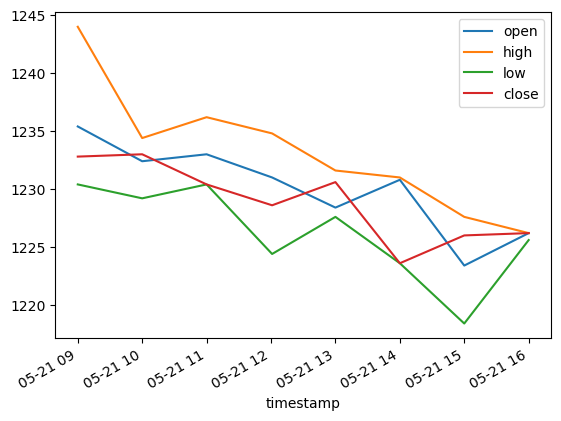

In [9]:
dfPd.plot.line(x="timestamp")

In [10]:
dfPd.hvplot.line(x="timestamp")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)